### Importing packages

In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score

In [ ]:
# uncomment for colab or for first time installment
!pip install astroquery

     |████████████████████████████████| 4.5 MB 13.5 MB/s 
     |████████████████████████████████| 832 kB 65.4 MB/s 
     |████████████████████████████████| 48 kB 4.6 MB/s 
     |████████████████████████████████| 4.0 MB 29.5 MB/s 


In [ ]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.gaia import TapPlus, GaiaClass   
from astroquery.vizier import Vizier
import warnings
warnings.filterwarnings('ignore')

## Comparing with Cantat Benchmark

In [ ]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'I/354': 'StarHorse2, Gaia EDR3 photo-astrometric distances (Anders+, 2022)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collabora

In [ ]:

catalog_list = Vizier.find_catalogs('open clusters Gaia DR2')
{k:v.description for k,v in catalog_list.items()}

{'J/A+A/618/A59': 'Gaia DR2 confirmed new nearby open clusters (Castro-Ginard+, 2018)',
 'J/A+A/618/A93': 'Gaia DR2 open clusters in the Milky Way (Cantat-Gaudin+, 2018)',
 'J/A+A/619/A155': 'Open cluster kinematics with Gaia DR2 (Soubiran+, 2018)',
 'J/A+A/623/A108': 'Age of 269 GDR2 open clusters (Bossini+, 2019)',
 'J/A+A/623/A22': 'IC 4996 Vilnius phot. and Gaia DR2 astrometry (Straizys+, 2019)',
 'J/A+A/624/A126': 'New open clusters in Perseus direction (Cantat-Gaudin+, 2019)',
 'J/A+A/627/A35': 'New open clusters in Galactic anti-centre (Castro-Ginard+, 2019)',
 'J/A+A/633/A99': 'Gaia DR2 open clusters in the Milky Way. II (Cantat-Gaudin+, 2020)',
 'J/A+A/635/A45': '570 new open clusters in the Galactic disc (Castro-Ginard+, 2020)',
 'J/A+A/637/A95': '16 open clusters UBVI and Gaia DR2 photometry (Perren+, 2020)',
 'J/A+A/646/A104': 'Improving the open cluster census. I. (Hunt+, 2021)',
 'J/AJ/156/94': 'APOGEE and Gaia DR2 analysis of IC 166 (Schiappacasse-Ulloa+, 2018)',
 'J/AJ/

In [ ]:


dias_data = Vizier(catalog = 'J/MNRAS/504/356/table12', row_limit = -1).query_constraints()
dias_data = dias_data[0].to_pandas()
dias_data

,Cluster,RA_ICRS,DE_ICRS,r50,N,pmRA,e_pmRA,pmDE,e_pmDE,Plx,...,logage,e_logage,__Fe_H_,e__Fe_H_,Av,e_Av,FileName,SimbadName,_RA.icrs,_DE.icrs
0,ASCC_10,51.8737,35.0113,0.498,31,-1.704,0.168,-1.348,0.141,1.465,...,8.178,0.155,0.109,0.100,0.820,0.110,clusters1/ASCC_10.dat,[KPR2005] 10,51.8737,35.0113
1,ASCC_101,288.4190,36.3653,0.357,72,0.924,0.272,1.364,0.289,2.502,...,8.521,0.162,0.004,0.064,0.152,0.071,clusters1/ASCC_101.dat,[KPR2005] 101,288.4190,36.3653
2,ASCC_105,295.6291,27.3637,0.678,126,1.461,0.240,-1.611,0.199,1.786,...,8.328,0.138,0.051,0.055,0.450,0.039,clusters1/ASCC_105.dat,[KPR2005] 105,295.6291,27.3637
3,ASCC_107,297.1623,22.0071,0.156,59,-0.144,0.135,-5.158,0.141,1.118,...,7.440,0.121,0.353,0.103,1.372,0.129,clusters1/ASCC_107.dat,[KPR2005] 107,297.1623,22.0071
4,ASCC_108,298.3162,39.3132,0.526,228,-0.509,0.101,-1.691,0.129,0.837,...,8.334,0.108,0.093,0.093,0.464,0.071,clusters1/ASCC_108.dat,[KPR2005] 108,298.3162,39.3132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,vdBergh_1,99.2807,3.0744,0.035,71,0.343,0.269,-0.786,0.181,0.521,...,7.713,0.467,0.318,0.179,2.299,0.189,clusters1/vdBergh_1.dat,Cl VDB 1,99.2807,3.0744
1739,vdBergh_130,304.4624,39.3404,0.049,62,-3.609,0.308,-5.075,0.292,0.521,...,6.974,0.091,-0.029,0.163,2.356,0.042,clusters2/vdBergh_130.dat,Cl VDB 130,304.4624,39.3404
1740,vdBergh_80,97.7471,-9.6215,0.151,60,-3.285,0.430,0.481,0.361,1.026,...,6.790,0.046,-0.148,0.091,1.726,0.219,clusters1/vdBergh_80.dat,Cl VDB 80,97.7471,-9.6215
1741,vdBergh_85,101.7288,1.3329,0.045,29,-0.973,0.147,0.345,0.164,0.550,...,7.104,0.125,-0.055,0.124,1.206,0.270,clusters1/vdBergh_85.dat,Cl VDB 85,101.7288,1.3329


In [ ]:
dias_data.columns

Index(['Cluster', 'RA_ICRS', 'DE_ICRS', 'r50', 'N', 'pmRA', 'e_pmRA', 'pmDE',
       'e_pmDE', 'Plx', 'e_Plx', 'RV', 'e_RV', 'NRV', 'Dist', 'e_Dist',
       'logage', 'e_logage', '__Fe_H_', 'e__Fe_H_', 'Av', 'e_Av', 'FileName',
       'SimbadName', '_RA.icrs', '_DE.icrs'],
      dtype='object')

In [ ]:
#get_galactic_coord
ra, dec = dias_data.RA_ICRS, dias_data.DE_ICRS
gal_coord = coord.SkyCoord(ra, dec, unit='deg').galactic
dias_data['GLON'] = gal_coord.l.deg
dias_data['GLAT'] = gal_coord.b.deg

In [ ]:
gal_coord.l.deg

array([155.70738807,  68.03169342,  62.8581623 , ..., 219.24780597,
       211.23007796, 224.60064216])

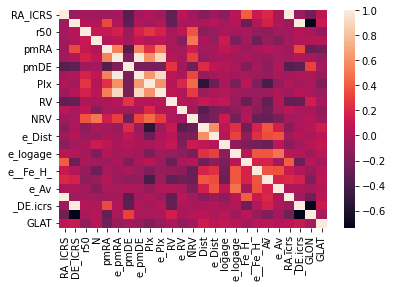

In [ ]:
sns.heatmap(dias_data.corr())

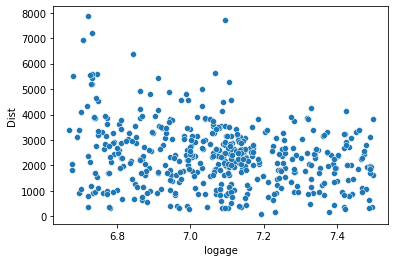

In [ ]:
sns.scatterplot(x = 'logage', y = 'Dist', 
                data = dias_data[dias_data.logage < 7.5])


In [ ]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'I/354': 'StarHorse2, Gaia EDR3 photo-astrometric distances (Anders+, 2022)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collabora

In [ ]:
Vizier.ROW_LIMIT = -1

cantat_data = Vizier(catalog = 'J/A+A/633/A99/table1', row_limit = -1).query_constraints()
cantat_data = cantat_data[0].to_pandas()
cantat_data

,Cluster,RA_ICRS,DE_ICRS,GLON,GLAT,r50,N,pmRA,pmDE,Plx,dmode,dmode_01,dmode-01,X,Y,Z,Rgc,SimbadName,_RA.icrs,_DE.icrs
0,ASCC_10,51.869999,34.980999,155.723007,-17.770,0.558,71,-1.737,-1.368,1.459,672.000000,629.599976,720.400024,-583.3,263.1,-205.100006,8927.200195,[KPR2005] 10,51.870,34.981
1,ASCC_101,288.398987,36.368999,68.028000,11.608,0.372,75,0.934,1.288,2.488,397.299988,382.200012,413.799988,145.6,360.9,79.900002,8202.299805,[KPR2005] 101,288.399,36.369
2,ASCC_105,295.548004,27.365999,62.825001,2.063,0.648,127,1.464,-1.635,1.783,551.799988,522.900024,584.000000,251.8,490.5,19.900000,8103.000000,[KPR2005] 105,295.548,27.366
3,ASCC_107,297.164001,21.987000,58.903999,-1.901,0.174,59,-0.155,-5.156,1.109,878.500000,807.599976,963.099976,453.5,751.9,-29.200001,7922.299805,[KPR2005] 107,297.164,21.987
4,ASCC_108,298.306000,39.348999,74.377998,6.074,0.537,230,-0.519,-1.690,0.838,1154.000000,1034.599976,1304.500000,309.0,1105.1,122.099998,8106.700195,[KPR2005] 108,298.306,39.349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,vdBergh_1,99.275002,3.078000,208.556000,-1.781,0.030,73,0.396,-0.771,0.523,1811.400024,1533.599976,2212.100098,-1590.2,-865.5,-56.299999,9967.900391,Cl VDB 1,99.275,3.078
1477,vdBergh_80,97.738998,-9.625000,219.246994,-8.891,0.143,79,-3.298,0.418,1.025,948.299988,866.200012,1047.699951,-725.6,-592.8,-146.600006,9085.000000,Cl VDB 80,97.739,-9.625
1478,vdBergh_83,100.025002,-27.188999,236.447998,-14.329,0.151,52,-2.896,3.199,1.034,940.299988,859.500000,1038.099976,-503.5,-759.3,-232.699997,8876.099609,Cl VDB 83,100.025,-27.189
1479,vdBergh_85,101.718002,1.320000,211.237000,-0.414,0.040,34,-1.000,0.328,0.552,1719.599976,1467.300049,2076.800049,-1470.3,-891.7,-12.400000,9850.799805,Cl VDB 85,101.718,1.320


In [ ]:
joined_data = dias_data.join(cantat_data.set_index('Cluster').loc[:, ['X', 'Y', 'Z','Rgc']], on = 'Cluster')
joined_data = joined_data.dropna()

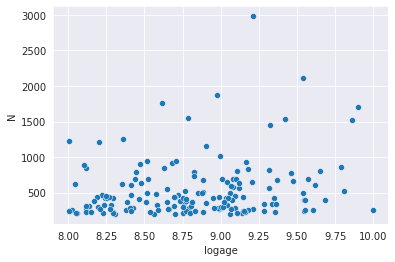

In [ ]:
n_mask = joined_data.N > 200
age_mask_old = joined_data.logage > 8
age_mask_young = joined_data.logage < 7.5
sns.scatterplot(x = 'logage', y = 'N', 
                data = joined_data[n_mask & age_mask_old])


In [ ]:
old_clusters = joined_data[n_mask & age_mask_old].sample(3, random_state = 42).reset_index()
young_clusters = joined_data[n_mask & age_mask_young].sample(3, random_state = 42).reset_index()


In [ ]:
joined_data['pm'] = np.sqrt(joined_data.pmRA**2 \
        + joined_data.pmDE**2)

joined_data['pm_kms'] = joined_data.pm * 365 * 24 * 3600 / 1.5 / 1e8 / joined_data.Plx
joined_data['true_vel'] = np.sqrt(joined_data.pm_kms**2 + joined_data.RV**2) 

(0.0, 16000.0)

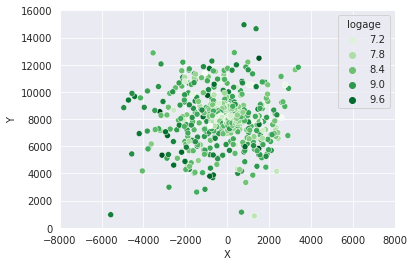

In [ ]:
sns.scatterplot(x='X', y=joined_data.Y + 8300, data=joined_data, hue = 'logage',
                marker = 'o', palette = 'Greens')
plt.xlim(-8000,8000)
plt.ylim(0,16000)


In [ ]:
def get_cantat_members(cluster):
    cluster_name = cluster.Cluster
    cantat_members = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster=cluster_name)
    cantat_members = cantat_members[0].to_pandas()

    center_ra, center_dec = cluster.RA_ICRS, cluster.DE_ICRS
    distance = np.sqrt( ((cantat_members['RA_ICRS'] - center_ra)*np.cos(np.radians(cantat_members['RA_ICRS'])))**2 \
                    + (cantat_members['DE_ICRS'] - center_dec)**2 )
    cantat_members['dist_center'] = distance
    return cantat_members

In [ ]:
member_list_old = []
for i in range(len(old_clusters)):
    members = get_cantat_members(old_clusters.iloc[i])
    member_list_old.append(members)

member_list_young = []
for i in range(len(young_clusters)):
    members = get_cantat_members(young_clusters.iloc[i])
    member_list_young.append(members)

In [ ]:
member_list_old[2].head()

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs,dist_center
0,308.088569,27.463555,1857034392972072320,0.9911,-1.914,-9.616,NaN,13.102900,0.7210,1.0,NGC_6940,308.088578,27.463596,0.872529
1,307.941994,27.425627,1857036145318573952,0.8499,-2.254,-9.243,NaN,16.612600,1.3973,0.7,NGC_6940,307.942005,27.425667,0.943392
2,307.276426,27.722211,1857024050698161408,1.0763,-1.914,-9.560,NaN,17.852501,1.7640,0.7,NGC_6940,307.276435,27.722252,0.980491
3,308.145424,27.590227,1857042020834160768,0.9866,-2.206,-9.331,13.640333,11.341200,1.0948,0.9,NGC_6940,308.145434,27.590267,0.742196
4,308.175724,27.505839,1857040577725029248,1.0280,-1.717,-9.650,NaN,16.416901,1.5198,1.0,NGC_6940,308.175732,27.505881,0.814154


In [ ]:
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
def plot_cmd(member_data):
    cmd = sns.scatterplot(x = 'BP-RP', y = 'Gmag', data = member_data)
    cmd.invert_yaxis()
    plt.xlabel('BP Magnitude - RP Magnitude')
    plt.ylabel('G Band Absolute Magnitude')
    plt.title(f'CMD of {member_data.Cluster[0]}')
    plt.show()

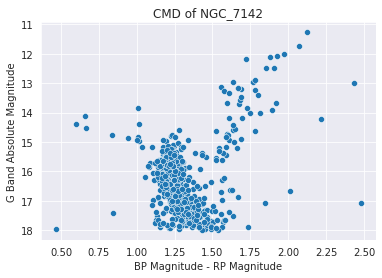

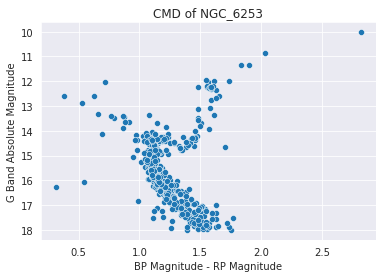

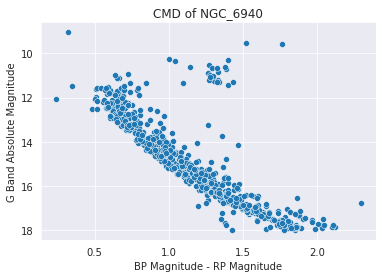

In [ ]:
for i in range(3):
    plot_cmd(member_list_old[i])

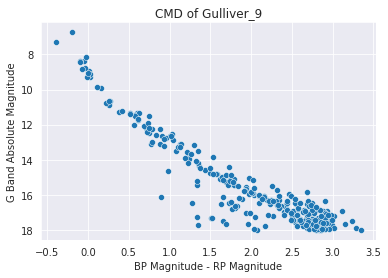

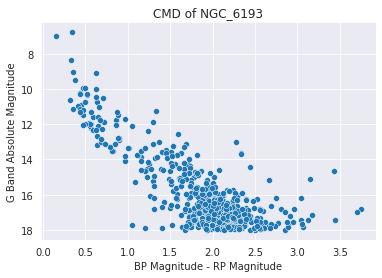

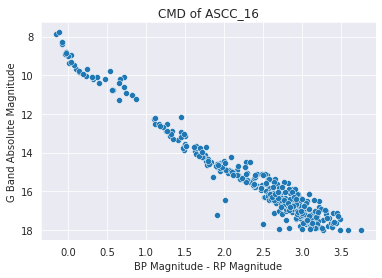

In [ ]:
for i in range(3):
    plot_cmd(member_list_young[i])

In [ ]:
np.linspace(7,18,12)
max_radius = max(member_list_old[1].dist_center)
outer_mask = member_list_old[1].dist_center >= max_radius / 2
counts, edges = np.histogram(member_list_old[1].Gmag[outer_mask], density = True, bins = np.linspace(7,18,12))
bin_means = np.array([np.mean(edges[i:i+2]) for i in range(len(edges)-1)])
counts = np.clip(counts, 1e-3, None)

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(bin_means)
ols = sm.OLS(np.log(counts), X).fit()
print(ols.summary())
# Now you have at your disposition several error estimates, e.g.
#ols_result.HC0_se
# and covariance estimates
#ols_result.cov_HC0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     77.41
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           1.03e-05
Time:                        23:17:12   Log-Likelihood:                -12.534
No. Observations:                  11   AIC:                             29.07
Df Residuals:                       9   BIC:                             29.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.9529      1.028    -12.603      0.0

In [ ]:
import statsmodels.api as sm

def get_slope(member_data, age=None):
    max_radius = max(member_data.dist_center)
    inner_mask = member_data.dist_center <= max_radius / 2
    outer_mask = member_data.dist_center >= max_radius / 2

    counts_inner, edges_inner = np.histogram(member_data.Gmag[inner_mask], density = True,
                                             bins = np.linspace(min(member_data.Gmag),max(member_data.Gmag),10))
    bin_means_inner = np.array([np.mean(edges_inner[i:i+2]) for i in range(len(edges_inner)-1)])
    counts_inner = np.clip(counts_inner, 1e-3, None)

    X = sm.add_constant(bin_means_inner)
    reg_inner = sm.OLS(np.log(counts_inner), X).fit()
    slope_inner, error_inner = reg_inner.params[1], reg_inner.bse[1]
    
    counts_outer, edges_outer = np.histogram(member_data.Gmag[outer_mask], density = True,
                                             bins = np.linspace(min(member_data.Gmag),max(member_data.Gmag),10))
    bin_means_outer = np.array([np.mean(edges_outer[i:i+2]) for i in range(len(edges_outer)-1)])
    counts_outer = np.clip(counts_outer, 1e-3, None)
    
    X = sm.add_constant(bin_means_outer)
    reg_outer = sm.OLS(np.log(counts_outer), X).fit()
    slope_outer, error_outer = reg_outer.params[1], reg_outer.bse[1]

    sns.regplot(bin_means_outer.reshape(-1,1), np.log(counts_outer), ci = 95, 
                label = f'outer region, slope: {slope_outer:.2f} $\pm$ {error_outer:.2f}')
    sns.regplot(bin_means_inner.reshape(-1,1), np.log(counts_inner), 
                ci = 95, label = f'inner region, slope: {slope_inner:.2f} $\pm$ {error_inner:.2f}')
    plt.legend()
    plt.ylabel('log (Number Density)')
    plt.xlabel('Absolute G Magnitude')
    plt.title(f'{member_data.Cluster[0]}, '+ '$\log_{10}$'+ f'(Age): {age:.2f}')
    plt.show()

    slope_diff = slope_outer - slope_inner
    error_slope_diff = np.sqrt( (error_inner**2 + error_outer**2)  )

    return reg_inner, reg_outer, slope_diff, error_slope_diff

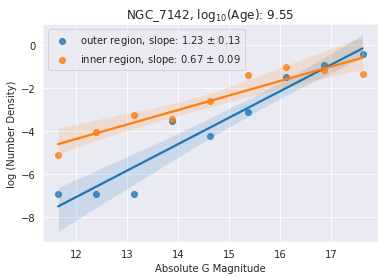

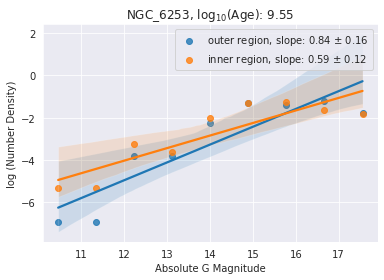

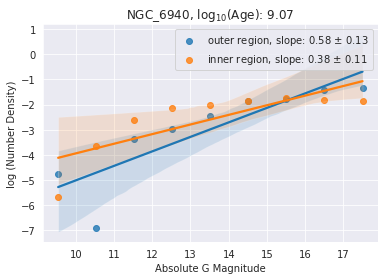

In [ ]:
slope_diff_old = []
error_slope_diff_old = []
for i in range(len(member_list_old)):
    reg_inner, reg_outer, slope_diff, error_slope_diff = get_slope(member_list_old[i],
                                                                   old_clusters.logage[i])
    slope_diff_old.append(slope_diff)
    error_slope_diff_old.append(error_slope_diff)


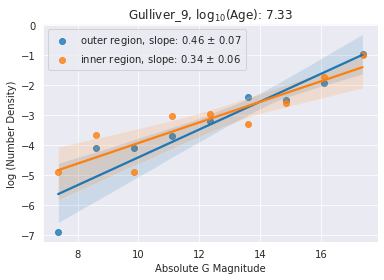

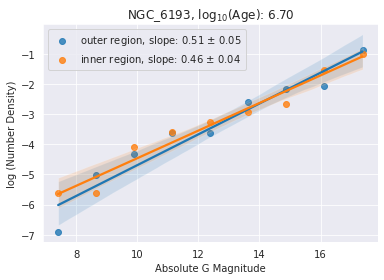

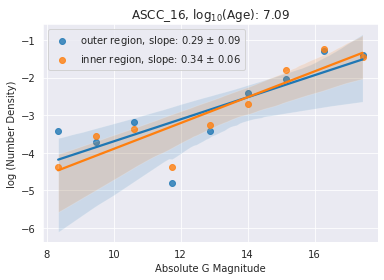

In [ ]:
slope_diff_young = []
error_slope_diff_young = []
for i in range(len(member_list_young)):
    reg_inner, reg_outer, slope_diff, error_slope_diff = get_slope(member_list_young[i],
                                                                   young_clusters.logage[i])
    slope_diff_young.append(slope_diff)
    error_slope_diff_young.append(error_slope_diff)


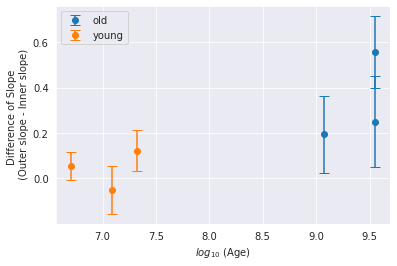

In [ ]:
plt.errorbar(old_clusters.logage, slope_diff_old, yerr = error_slope_diff_old, 
             label='old', ls = "", marker = 'o', capsize = 5)
plt.errorbar(young_clusters.logage, slope_diff_young, yerr = error_slope_diff_young, 
             label='young', ls = "", marker = 'o', capsize = 5)
plt.legend(loc="upper left")
plt.xlabel('$log_{10}$ (Age)')
plt.ylabel('Difference of Slope \n (Outer slope - Inner slope)')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
def get_slope(member_data):
    max_radius = max(member_data.dist_center)
    inner_mask = member_data.dist_center <= max_radius / 2
    outer_mask = member_data.dist_center >= max_radius / 2

    counts_inner, edges_inner = np.histogram(member_data.Gmag[inner_mask], density = True,
                                             bins = np.linspace(min(member_data.Gmag),max(member_data.Gmag),10))
    bin_means_inner = np.array([np.mean(edges_inner[i:i+2]) for i in range(len(edges_inner)-1)])
    counts_inner = np.clip(counts_inner, 1e-3, None)
    
    reg_inner = LinearRegression()
    reg_inner.fit(bin_means_inner.reshape(-1,1), np.log(counts_inner))
    r2_outer = reg_inner.score(bin_means_inner.reshape(-1,1), np.log(counts_inner))

    counts_outer, edges_outer = np.histogram(member_data.Gmag[outer_mask], density = True,
                                             bins = np.linspace(min(member_data.Gmag),max(member_data.Gmag),10))
    bin_means_outer = np.array([np.mean(edges_outer[i:i+2]) for i in range(len(edges_outer)-1)])
    counts_outer = np.clip(counts_outer, 1e-3, None)
    
    reg_outer = LinearRegression()
    reg_outer.fit(bin_means_outer.reshape(-1,1), np.log(counts_outer))
    r2_inner = reg_inner.score(bin_means_outer.reshape(-1,1), np.log(counts_outer))

    sns.regplot(bin_means_outer.reshape(-1,1), np.log(counts_outer), ci = 95, 
                label = f'outer region, slope: {reg_outer.coef_[0]:.2f}')
    sns.regplot(bin_means_inner.reshape(-1,1), np.log(counts_inner), 
                ci = 95, label = f'inner region, slope: {reg_inner.coef_[0]:.2f}')
    plt.legend()
    plt.ylabel('log (Fraction)')
    plt.xlabel('Absolute G Magnitude')
    plt.title(f'{member_data.Cluster[0]}')
    plt.show()

    error_slope_diff = np.sqrt( ((1-r2_inner)**2 + (1-r2_outer)**2) /2 )

    return reg_inner, reg_outer, r2_inner, r2_outer, error_slope_diff

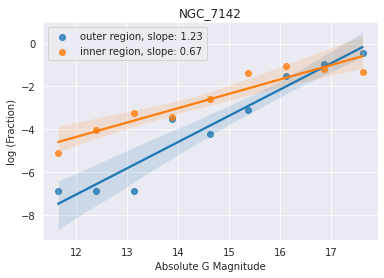

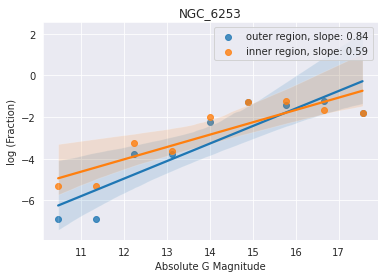

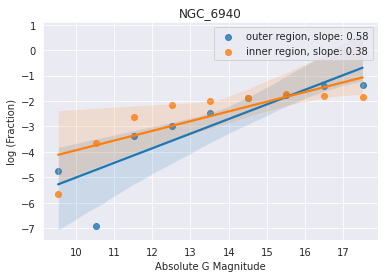

In [ ]:
slope_diff_old = []
error_slope_diff_old = []
for i in range(len(member_list_old)):
    reg_inner, reg_outer, r2_inner, r2_outer, error_slope_diff = get_slope(member_list_old[i])
    slope_diff_old.append(reg_outer.coef_[0] -  reg_inner.coef_[0])
    error_slope_diff_old.append(error_slope_diff)


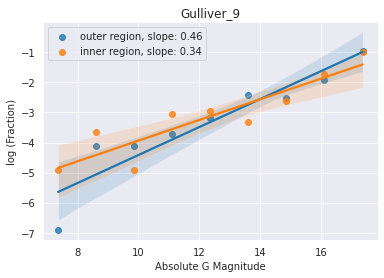

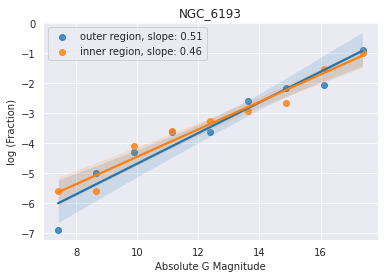

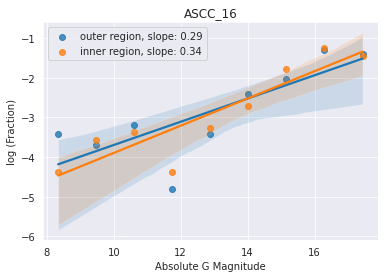

In [ ]:
slope_diff_young = []
error_slope_diff_young = []
for i in range(len(member_list_young)):
    reg_inner, reg_outer, r2_inner, r2_outer, error_slope_diff = get_slope(member_list_young[i])
    slope_diff_young.append(reg_outer.coef_[0] -  reg_inner.coef_[0])
    error_slope_diff_young.append(error_slope_diff)


Text(0, 0.5, 'Difference of Slope')

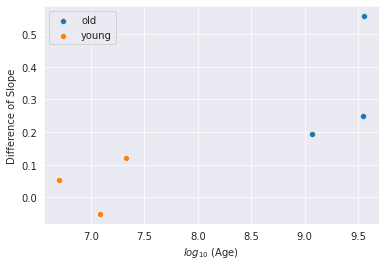

In [ ]:
sns.scatterplot(old_clusters.logage, slope_diff_old, label='old')
sns.scatterplot(young_clusters.logage, slope_diff_young, label='young')
plt.legend()
plt.xlabel('$log_{10}$ (Age)')
plt.ylabel('Difference of Slope')

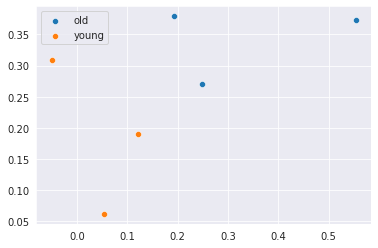

In [ ]:
sns.scatterplot(slope_diff_old, error_slope_diff_old, label='old')
sns.scatterplot(slope_diff_young, error_slope_diff_young, label='young')